This is the Isolation Forest Example of the Skicit-learn website.

Packages are imported

In [1]:
#packages are imported
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

C:\Users\aaron.de.rybel\PycharmProjects\EmergentTechnologies\venv\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


Random points around locations (-2,-2) and (2,2) are generated. The training data is used in constructing the IsolationForest later on.

The regular novel observations and abnormal observations are used for testing the predictive power of IsolationForest.

In [2]:
rng = np.random.RandomState(42)

# Generate train data
X = 0.3 * rng.randn(100, 2)
X_train = np.r_[X + 2, X - 2]
# Generate some regular novel observations
X = 0.3 * rng.randn(20, 2)
X_test = np.r_[X + 2, X - 2]
# Generate some abnormal novel observations
X_outliers = rng.uniform(low=-4, high=4, size=(20, 2))


Using the training Data to construct the Iforest. 
calculate decision scores from Iforest and prepare them for colormap plotting.  

In [6]:


# fit the model
clf = IsolationForest(max_samples=100, random_state=rng, contamination=0.01)
clf.fit(X_train)


# plot the line, the samples, and the nearest vectors to the plane
xx, yy = np.meshgrid(np.linspace(-5, 5, 50), np.linspace(-5, 5, 50))
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

C:\Users\aaron.de.rybel\PycharmProjects\EmergentTechnologies\venv\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Plot all the datapoints and the scores. The scores are visualized in a blue color map. the darker blue the background the more likely datapoints in this region are outliers. 

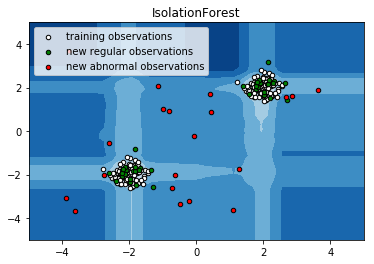

In [7]:
plt.title("IsolationForest")
plt.contourf(xx, yy, Z, cmap=plt.cm.Blues_r)

b1 = plt.scatter(X_train[:, 0], X_train[:, 1], c='white',
                 s=20, edgecolor='k')
b2 = plt.scatter(X_test[:, 0], X_test[:, 1], c='green',
                 s=20, edgecolor='k')
c = plt.scatter(X_outliers[:, 0], X_outliers[:, 1], c='red',
                s=20, edgecolor='k')

plt.axis('tight')
plt.xlim((-5, 5))
plt.ylim((-5, 5))
plt.legend([b1, b2, c],
           ["training observations",
            "new regular observations", "new abnormal observations"],
           loc="upper left")
plt.show()

The Prediction of Iforest for each datapoint can be added, we use black crosses to vizualize predicted outliers. Based on the score a certain treshold can be determined. This is done with the predict function.  


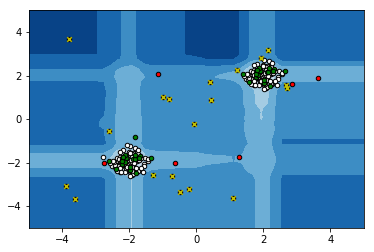

In [8]:
#plot previous plot again in new figure
plt.contourf(xx, yy, Z, cmap=plt.cm.Blues_r)

plt.scatter(X_train[:, 0], X_train[:, 1], c='white',
                 s=20, edgecolor='k')
plt.scatter(X_test[:, 0], X_test[:, 1], c='green',
                 s=20, edgecolor='k')
plt.scatter(X_outliers[:, 0], X_outliers[:, 1], c='red',
                s=20, edgecolor='k')

#Predict Outliers from Iforest model
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
y_pred_outliers = clf.predict(X_outliers)


#make boolean arrays to only keep predicted outliers from datasets.
bool_train = y_pred_train == -1
bool_test = y_pred_test == -1
bool_outlier = y_pred_outliers == -1

#plot with masks using the boolean arrays.
plt.scatter(X_train[bool_train, 0], X_train[bool_train, 1], c='y',
            s=20,marker='x')
plt.scatter(X_test[bool_test, 0], X_test[bool_test, 1],c='y',
            s=20, marker='x')
plt.scatter(X_outliers[bool_outlier, 0], X_outliers[bool_outlier, 1], c='y',
            s=20, marker='x')
plt.axis('tight')
plt.xlim((-5, 5))
plt.ylim((-5, 5))

plt.show()
